## Intermediate Data Science

#### University of Redlands - DATA 201
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data201.joannabieri.com](https://joannabieri.com/data201_intermediate.html)

In [7]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

In [13]:
#Make sure that you load the new packages from lecture if needed
!conda install -y lxml beautifulsoup4 html5lib
!conda install -y openpyxl xlrd
!conda install -y requests

Error while loading conda entry point: conda-libmamba-solver (dlopen(/Users/sethchairez/anaconda3/lib/python3.12/site-packages/libmambapy/bindings.cpython-312-darwin.so, 0x0002): Library not loaded: @rpath/libarchive.19.dylib
  Referenced from: <DABAAA67-C742-3F02-A1E7-430216CA1374> /Users/sethchairez/anaconda3/lib/libmamba.2.0.0.dylib
  Reason: tried: '/Users/sethchairez/anaconda3/lib/libarchive.19.dylib' (no such file), '/Users/sethchairez/anaconda3/lib/python3.12/site-packages/libmambapy/../../../libarchive.19.dylib' (no such file), '/Users/sethchairez/anaconda3/lib/python3.12/site-packages/libmambapy/../../../libarchive.19.dylib' (no such file), '/Users/sethchairez/anaconda3/bin/../lib/libarchive.19.dylib' (no such file), '/Users/sethchairez/anaconda3/bin/../lib/libarchive.19.dylib' (no such file), '/usr/local/lib/libarchive.19.dylib' (no such file), '/usr/lib/libarchive.19.dylib' (no such file, not in dyld cache))

CondaValueError: You have chosen a non-default solver backend (lib

### You Try - 3 Warm-Up Problems From Lecture

Here is a file that does not just read in nicely. See if you can use optional arguments to read it in.

*Hint* How many (and which) rows of this data are just junk?

**Terminal Command Line:**

The command

        cat data/ex4.csv

if typed into a terminal prints out the contents of the file line by line. This lets us take a quick look at what is in the file. BEWARE - if you do this with a large file it will take a long time to print! Another great command is:

        head data/ex4.csv

would just show the first 10 lines of the file!

In [18]:
# This code lets you look at the data
# the terminal command "cat" - prints the contents of a file
# when we do !cat filename we can look at the 
file_name = 'data/ex4.csv'
!cat data/ex4.csv

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [20]:
# Your code here
file_name = 'data/ex4.csv'
names = ['a','b','c','d','message']
pd.read_csv(file_name,names=names, index_col = 'message',skiprows =[0,2,3,1])
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


------------------------------------------------------

In [22]:
# EXAMPLES - DICTIONARY TO PANDAS
my_dict = {"name": "Wes",
 "cities_lived": ["Akron", "Nashville", "New York", "San Francisco"],
 "pet": None,
 "siblings": [{"name": "Scott", "age": 34, "hobbies": ["guitars", "soccer"]},
              {"name": "Katie", "age": 42, "hobbies": ["diving", "art"]}]
}
my_dict

{'name': 'Wes',
 'cities_lived': ['Akron', 'Nashville', 'New York', 'San Francisco'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 34, 'hobbies': ['guitars', 'soccer']},
  {'name': 'Katie', 'age': 42, 'hobbies': ['diving', 'art']}]}

In [24]:
for key in my_dict.keys():
    print(key)
    print(my_dict[key])
    print('----------')

name
Wes
----------
cities_lived
['Akron', 'Nashville', 'New York', 'San Francisco']
----------
pet
None
----------
siblings
[{'name': 'Scott', 'age': 34, 'hobbies': ['guitars', 'soccer']}, {'name': 'Katie', 'age': 42, 'hobbies': ['diving', 'art']}]
----------


In [26]:
# This code will give you an error
df = pd.DataFrame(my_dict)
df

ValueError: All arrays must be of the same length

In [28]:
# This code will work
df = pd.DataFrame(my_dict['siblings'])
df

,name,age,hobbies
0,Scott,34,"[guitars, soccer]"
1,Katie,42,"[diving, art]"


### You Try:

Can you explain what is going on in the examples above? Why does one give an error and the other works? What specifically is it about focusing in on the siblings data that allows pandas to read this?

**Your explanation here:** JSON files are normally ready in with a hierarchical structure. This means that if you are trying to find a certain key value then this is what you must use. The reason that the for loop print the key and the each individaual key in each line of the dictionary is because it is structured to give out only key values. The reason the other does not work is because you cannot read in a JSON file as a flat table. You must be looking for a certain key. 

---------------------------------------

### You Try

Here is an example website that contains a table:

https://www.scrapethissite.com/pages/forms/

1. Open the website in your browser. Does the page that appears contain ALL the data about hockey teams?
2. How does the web address change when you select the second page of the website.
3. See if you can write code that will scrape all of the data. HINT: I would use a for loop that updates the web address and appends the new table to a list.
4. Once you have the list of tables can you get them into a single data frame and save the data as a .csv?

In [33]:
# Here is how I could get one page
website = 'https://www.scrapethissite.com/pages/forms/'
tables = pd.read_html(website)
len(tables)

1

In [41]:
# Your code here
the_table = tables[0]
the_table.head()

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,NaN,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,NaN,0.388,292,278,14
2,Calgary Flames,1990,46,26,NaN,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,NaN,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,NaN,0.425,273,298,-25


In [47]:
website_list = [] 
for i in range(1,10):
    url = f'https://www.scrapethissite.com/pages/forms/?page_num={i}'
    print(url)
    #pd.read_html
    website_list.append(pd.read_html(url))

https://www.scrapethissite.com/pages/forms/?page_num=1
https://www.scrapethissite.com/pages/forms/?page_num=2
https://www.scrapethissite.com/pages/forms/?page_num=3
https://www.scrapethissite.com/pages/forms/?page_num=4
https://www.scrapethissite.com/pages/forms/?page_num=5
https://www.scrapethissite.com/pages/forms/?page_num=6
https://www.scrapethissite.com/pages/forms/?page_num=7
https://www.scrapethissite.com/pages/forms/?page_num=8
https://www.scrapethissite.com/pages/forms/?page_num=9


In [51]:
pages = [] 
for i in range(1,10):
    url = f'https://www.scrapethissite.com/pages/forms/?page_num={i}'
    df = pd.read_html(url)[0]
    pages.append(df)

final_df = pd.concat(pages, ignore_index = True)
final_df.to_csv('scraped_data.csv', index = False)
final_df

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
0,Boston Bruins,1990,44,24,NaN,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,NaN,0.388,292,278,14
2,Calgary Flames,1990,46,26,NaN,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,NaN,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,NaN,0.425,273,298,-25
...,...,...,...,...,...,...,...,...,...
220,Tampa Bay Lightning,1998,19,54,NaN,0.232,179,292,-113
221,Toronto Maple Leafs,1998,45,30,NaN,0.549,268,231,37
222,Vancouver Canucks,1998,23,47,NaN,0.280,192,258,-66
223,Washington Capitals,1998,31,45,NaN,0.378,200,218,-18


------------------------------------------------

## Reading and Writing Data - Day3 HW

## Homework 3

Go to Kaggle Datasets: https://www.kaggle.com/datasets

Find a data set that you are interested in looking at. You are welcome to work together and choose a data set as a group! You should read in this data and do some basic statistics on the data set. Answer the following questions:

1. Tell your reader about the data: Where did you get it? When did you access it? Who owns it? What is the license? Are there any acknowledgments that you should give for using the data? All of this should be on the Kaggle page
2. How many variables and observations?
3. What type of data is contained? Was it read in as strings, ints, floats?
4. Are there any NaNs or weird data types that you can see?
5. Most Kaggle datasets contain some basic stats or visualizations on the download page. See if you can recreate some of the plots or data you see on the website.
6. Come up with at least one question of your own that you can answer by analyzing the data.
7. Create a dataframe with just the data you need to answer your question - save the data subset to a file (your choice of type)
8. **In a NEW NOTEBOOK** Write code that reads in your subset of the data, markdown that explains clearly where you got the data originally (license and references included) and the process you took to create your subset, a description of the question you are answering, and code that can reliably run and answer your question followed by words that explain your results.

------------------------------------

Your final notebooks should:

- [ ] Be completely new notebooks with just the Day3 stuff in it: First the code that creates your data and second the code that reads in the data and does the analysis. 
- [ ] Be reproducible with junk code removed.
- [ ] Have lots of language describing what you are doing, especially for questions you are asking or things that you find interesting about the data. Use complete sentences, nice headings, and good markdown formatting: https://www.markdownguide.org/cheat-sheet/
- [ ] It should run without errors from start to finish.

In [ ]:
DONT FORGET TO HAND IN YOUR DATA!!!!

In [54]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

import kagglehub

/Users/sethchairez/anaconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



## 1.Tell your reader about the data: Where did you get it? When did you access it? Who owns it? What is the license? Are there any acknowledgments that you should give for using the data? All of this should be on the Kaggle page
This data was accessed through Kaggle. I was able to acess it on 9/11/2025. The data has been open for about 4 years and was reccently updated a year ago. The owner goes by the name "Nadeem Majeed". The license on the data is the community data license agreement. I do not see any acknowledgements however it is important to mention that Nadeem Majeed is the owner of the data set and it has the "Community Data License Agreement - Sharing - Version 1.0" 

In [68]:
file = 'gym_members_exercise_tracking_synthetic_data.csv'
df = pd.read_csv(file)
df 

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34.0,Female,86.7,1.86,174,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.31
1,26.0,Female,84.7,1.83,166,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.49
2,22.0,Male,64.8,1.85,187,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.73
3,54.0,Female,75.3,1.82,187,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.37
4,34.0,Female,52.8,1.74,177,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,54.0,Male,88.5,2.00,173,134.0,58.0,1.11,1388.0,HIIT,27.7,3.7,3.0,2.0,36.73
1796,52.0,Male,84.3,1.69,164,169.0,54.0,0.77,1367.0,HIIT,32.6,2.9,3.0,2.0,15.11
1797,47.0,Male,70.1,1.84,188,129.0,67.0,1.20,1261.0,Strength,28.4,2.5,3.0,2.0,17.99
1798,35.0,Male,49.3,1.71,180,152.0,73.0,1.04,956.0,Cardio,32.9,1.7,4.0,3.0,12.65


## 2. How many variables and observations?


In [72]:
df.shape

(1800, 15)

In this data set, there are 1800 observations and 15 variables. 

## 3. What type of data is contained? Was it read in as strings, ints, floats?

In [94]:
df.dtypes

Age                              float64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                           object
Avg_BPM                          float64
Resting_BPM                      float64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)    float64
Experience_Level                 float64
BMI                              float64
dtype: object

The variables within the data set are floats and strings 

## 4.Are there any NaNs or weird data types that you can see?

In [ ]:
df.isna().sum()

In the data set, there are various NaN's however there is no ordinary pieces of data. Every single one of the variables within the data has a NaN. 

In [91]:
df.keys()

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

## 5.Most Kaggle datasets contain some basic stats or visualizations on the download page. See if you can recreate some of the plots or data you see on the website.


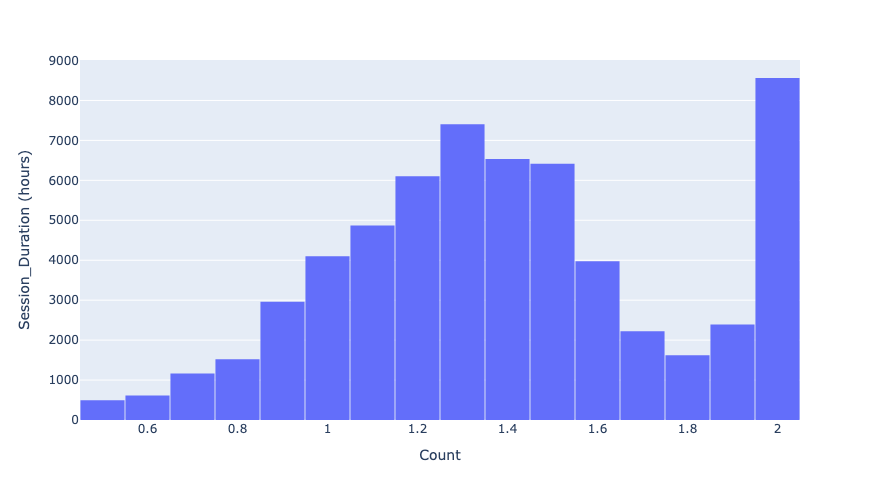

In [109]:
fig = px.histogram(df,
                 x='Session_Duration (hours)',
                 y= 'Age',
                 nbins=20,
                  )

fig.update_layout(bargap=0.02,
                  yaxis_title="Session_Duration (hours)",
                  xaxis_title="Count",
                  autosize=False,
                  width=800,
                  height=500)

fig.show()

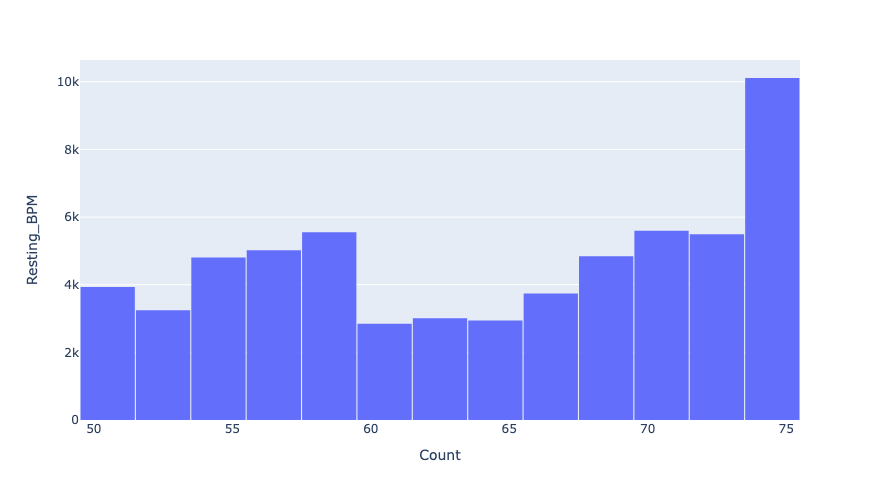

In [113]:
fig = px.histogram(df,
                 x='Resting_BPM',
                 y= 'Age',
                 nbins=13,
                  )

fig.update_layout(bargap=0.02,
                  yaxis_title="Resting_BPM",
                  xaxis_title="Count",
                  autosize=False,
                  width=800,
                  height=500)

fig.show()

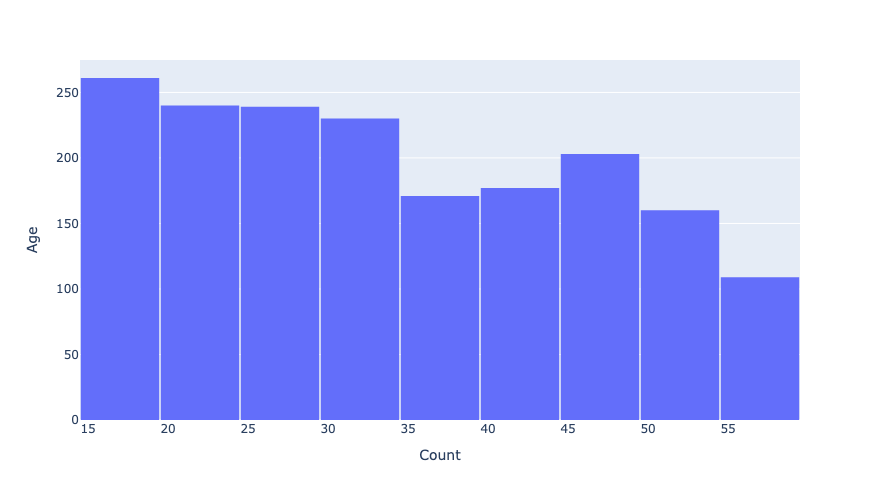

In [116]:
fig = px.histogram(df,
                 x='Age',
                 nbins=20,
                  )

fig.update_layout(bargap=0.02,
                  yaxis_title="Age",
                  xaxis_title="Count",
                  autosize=False,
                  width=800,
                  height=500)

fig.show()

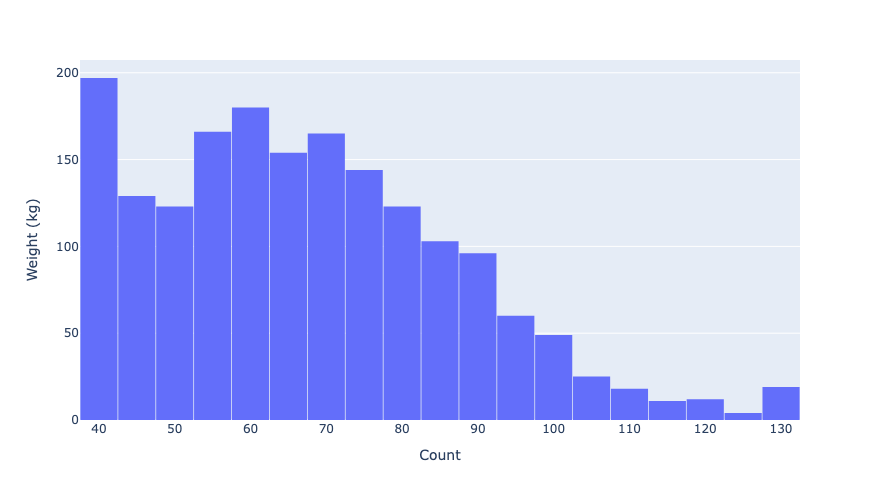

In [119]:
fig = px.histogram(df,
                 x='Weight (kg)',
                 #y= 'Age',
                 nbins=18,
                  )

fig.update_layout(bargap=0.02,
                  yaxis_title="Weight (kg)",
                  xaxis_title="Count",
                  autosize=False,
                  width=800,
                  height=500)

fig.show()

## 6. Come up with at least one question of your own that you can answer by analyzing the data.


question: What are the 3 most effect types of workouts that will burn the most burn the most calories in the least amount of time? 

In [139]:
df.keys()

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

## 7. Create a dataframe with just the data you need to answer your question - save the data subset to a file (your choice of type)

In [231]:
df_for_question = df[['Calories_Burned', 'Workout_Type','Session_Duration (hours)']]
df_for_question

,Calories_Burned,Workout_Type,Session_Duration (hours)
0,712.0,Strength,1.12
1,833.0,Strength,1.00
2,1678.0,Cardio,1.24
3,628.0,Cardio,1.45
4,1286.0,Strength,1.60
...,...,...,...
1795,1388.0,HIIT,1.11
1796,1367.0,HIIT,0.77
1797,1261.0,Strength,1.20
1798,956.0,Cardio,1.04


In [229]:
df_for_question.to_csv('df_for_question.csv',index = False)

In [239]:
df['Workout_Type'].unique()

array(['Strength', 'Cardio', 'HIIT', 'Yoga', nan, '\\nStrength',
       '\\tCardio', '\\tYoga'], dtype=object)